## Objetivos da Análise Exploratória de Dados (EDA) – Ocorrencias



## Seleção de colunas e descrição geral dos dados

In [1]:
import os 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#carrega os datasets em ordem (ano , ordem crescente)
directory = os.path.join('..','data','raw','datatran','ocorrencia')
fpaths = [fpath for fpath in os.listdir(directory)]
fpaths.sort(key=lambda s:int(s[8:12]))
data = [pd.read_csv(os.path.join(directory,fpath),sep=';',encoding='latin1') for fpath in fpaths]

C:\Users\Carlos\AppData\Local\Temp\ipykernel_5048\597029189.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = [pd.read_csv(os.path.join(directory,fpath),sep=';',encoding='latin1') for fpath in fpaths]
C:\Users\Carlos\AppData\Local\Temp\ipykernel_5048\597029189.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = [pd.read_csv(os.path.join(directory,fpath),sep=';',encoding='latin1') for fpath in fpaths]
C:\Users\Carlos\AppData\Local\Temp\ipykernel_5048\597029189.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = [pd.read_csv(os.path.join(directory,fpath),sep=';',encoding='latin1') for fpath in fpaths]


In [3]:
line = '___________________________________________________________________________________________________________________'
# Limpando o nome das colunas
for df in data:
    df.columns = df.columns.str.strip().str.lower()
# Testa se todos os datasets tem as mesmas colunas
equal = [df.columns.equals(data[0].columns) for df in data]
print('Todos os datasets apresentam as mesmas colunas') if all(equal) else print('Existem diferentes colunas nos datasets')
print(f"número de colunas do dataset que aprensenta o menor número de colunas: {min(len(df.columns) for df in data)}")
print(line)
# Cria o grupo união e intersecção de todas as colunas
un_cols,in_cols = [],[]
for df in data:
    for col in df.columns:
        if not col in un_cols:
            un_cols.append(col)
for col in un_cols:
    if all(col in list(df.columns) for df in data):
        in_cols.append(col)
print('Conjunto união das colunas')
print(f"{' | '.join(un_cols)}\ntamanho:{len(un_cols)}")
print('Conjunto intersecção das colunas')
print(f"{' | '.join(in_cols)}\ntamanho:{len(in_cols)}")
print('Conjunto complement U-I')
print(f"{' | '.join(set(un_cols)-set(in_cols))}")
# Como o dataset com o menor número de colunas possui 25 colunas, 
# e o conjunto de interseção também contém 25 colunas, podemos concluir 
# que o dataset com 25 colunas corresponde exatamente ao conjunto de interseção.

# Este codigo gera colunas alteradas ano a ano
print(line)
print('Colunas alteradas ano a ano')
for i,df in enumerate(data[:-1]):
    year = 2007+i
    current_year = set(df.columns)
    next_year = set(data[i+1].columns)
    add = next_year - current_year
    add = 'adicionadas: ' +' | '.join(add) if len(add)!=0 else ''
    sub = current_year - next_year
    sub = 'removidas: ' +' | '.join(sub) if len(sub)!=0 else ''
    print(f"Year:{year}-{year+1} {add} {sub}") if add or sub else ''
# com isto acredito ser bom usar apenas os dados que vem após 2017(incluso) porque a partir desta data
# é adicionada longitude e latitude, que acredito serem importantes para o projeto

Existem diferentes colunas nos datasets
número de colunas do dataset que aprensenta o menor número de colunas: 25
___________________________________________________________________________________________________________________
Conjunto união das colunas
id | data_inversa | dia_semana | horario | uf | br | km | municipio | causa_acidente | tipo_acidente | classificacao_acidente | fase_dia | sentido_via | condicao_metereologica | tipo_pista | tracado_via | uso_solo | ano | pessoas | mortos | feridos_leves | feridos_graves | ilesos | ignorados | feridos | veiculos | latitude | longitude | regional | delegacia | uop
tamanho:31
Conjunto intersecção das colunas
id | data_inversa | dia_semana | horario | uf | br | km | municipio | causa_acidente | tipo_acidente | classificacao_acidente | fase_dia | sentido_via | condicao_metereologica | tipo_pista | tracado_via | uso_solo | pessoas | mortos | feridos_leves | feridos_graves | ilesos | ignorados | feridos | veiculos
tamanho:25
Conjunto compl

In [4]:
#Seleciona os dados de 2017 em diante e concatena os datasets
dataset = pd.concat(data[10:])

In [ ]:
# Entendendo dataset 
print(dataset.shape)
print(' | '.join(dataset.columns))
print(dataset.info())
print('Número de valores duplicados',dataset.duplicated().sum())

(560138, 30)
id | data_inversa | dia_semana | horario | uf | br | km | municipio | causa_acidente | tipo_acidente | classificacao_acidente | fase_dia | sentido_via | condicao_metereologica | tipo_pista | tracado_via | uso_solo | pessoas | mortos | feridos_leves | feridos_graves | ilesos | ignorados | feridos | veiculos | latitude | longitude | regional | delegacia | uop
<class 'pandas.core.frame.DataFrame'>
Index: 560138 entries, 0 to 73155
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      560138 non-null  float64
 1   data_inversa            560138 non-null  object 
 2   dia_semana              560138 non-null  object 
 3   horario                 560138 non-null  object 
 4   uf                      560138 non-null  object 
 5   br                      560138 non-null  int64  
 6   km                      560138 non-null  object 
 7   municipio               560138 

In [6]:
dataset.head(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,17.0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Defeito Mecânico no Veículo,Colisão traseira,...,0,2,0,4,2,"-28,5071196","-50,941176",SPRF-RS,DEL05-RS,UOP03-DEL05-RS
1,20.0,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade Incompatível,Saída de leito carroçável,...,0,1,0,0,2,"-25,754","-49,1266",SPRF-PR,DEL01-PR,DEL7/1-UOP08/PR
2,69.0,2017-01-01,domingo,04:40:00,BA,101,65,ENTRE RIOS,Condutor Dormindo,Colisão frontal,...,1,2,0,2,2,"-11,9618","-38,0953",SPRF-BA,DEL01-BA,UOP04-DEL01-BA
3,106.0,2017-01-01,domingo,06:30:00,PA,316,"72,5",CASTANHAL,Falta de Atenção à Condução,Colisão lateral,...,0,3,0,0,3,"-1,2899799","-47,83483207",SPRF-PA,DEL01-PA,DEL19/1-UOP02/PA
4,109.0,2017-01-01,domingo,09:00:00,GO,20,"220,5",POSSE,Defeito na Via,Colisão com objeto estático,...,1,0,1,3,2,"-14,14220931","-46,32258922",SPRF-DF,DEL02-DF,UOP03-DEL02-DF


In [7]:
#Optei por não transformar km aqui, porque acredito que não faz sentido usar describe na coluna km
numericas = [
    'pessoas',
    'mortos',
    'feridos_leves',
    'feridos_graves',
    'ilesos',
    'ignorados',
    'feridos',
    'veiculos',  
]
for numerica in numericas:
    dataset[numerica] = dataset[numerica].astype(int)
dataset[numericas].describe()

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,560138.000000,560138.000000,560138.000000,560138.000000,560138.000000,560138.000000,560138.000000,560138.000000
mean,2.525467,0.079943,0.843173,0.263080,1.044653,0.374627,1.106252,1.959699
std,2.020465,0.337474,1.086182,0.608292,1.550261,0.801450,1.216756,1.085935
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,95.000000,37.000000,83.000000,35.000000,78.000000,88.000000,84.000000,131.000000


In [8]:
categoricas = [
    'br',
    'dia_semana',
    'uf',
    'municipio',
    'causa_acidente',
    'tipo_acidente',
    'classificacao_acidente',
    'fase_dia',
    'sentido_via',
    'condicao_metereologica',
    'tipo_pista',
    'tracado_via',
    'uso_solo',
    'regional',
    'delegacia',
    'uop'
]
#conta os tipos diferentes de categoria para cada categoria
dataset[categoricas].nunique()

br                         133
dia_semana                   7
uf                          27
municipio                 2120
causa_acidente              91
tipo_acidente               21
classificacao_acidente       3
fase_dia                     4
sentido_via                  3
condicao_metereologica      10
tipo_pista                   3
tracado_via               1183
uso_solo                     2
regional                    28
delegacia                  154
uop                        433
dtype: int64

## Parte 2

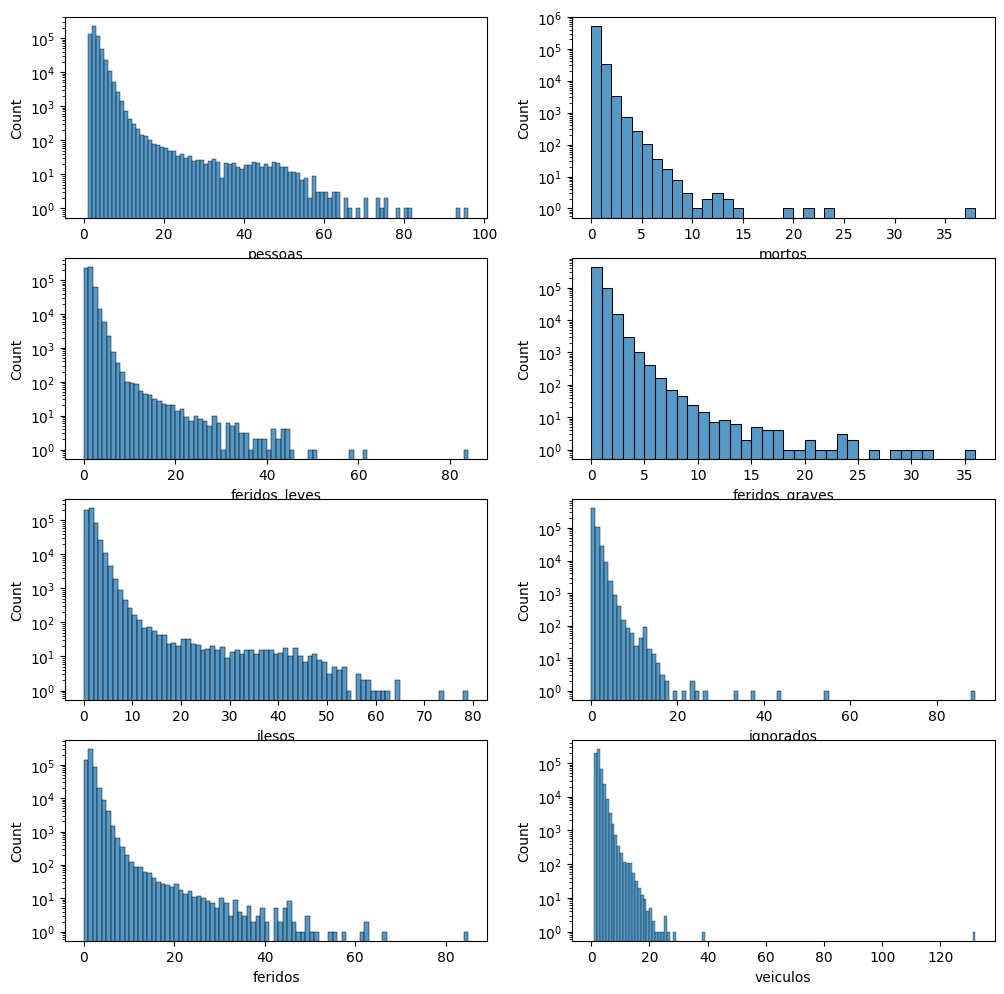

In [12]:
# Fiz a remoção de uma lina para
fig,axes = plt.subplots(4,2,figsize=(12,12))
axes = axes.flatten()
for i,numerica in enumerate(numericas):
    sns.histplot(dataset[numerica],ax=axes[i],bins=range(0,dataset[numerica].max()+2))
    axes[i].set_yscale('log')
plt.show()